In [36]:
import pandas as pd

file_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121similarity_scores_multitopic.csv'
df = pd.read_csv(file_path)
df.head()

,rowid,name,cailu,provgb,citygb,cntygb,area,geocode,PROVGB_1953,CITYGB_1953,...,佛教_相似度,杀戮_相似度,信任_相似度,惩罚_相似度,长寿_相似度,慈善_相似度,儒家_相似度,诚实_相似度,平等_相似度,努力_相似度
0,1,04946__322老汉的宝物,missing values,missing valuesd,missing valuesd,missing valuesd,宁夏撒拉族循化貝,"{'lng': 116.413384, 'lat': 39.910925}",NaN,NaN,...,0.717883,0.631977,0.731195,0.691494,0.713617,0.699354,0.689755,0.652281,0.691983,0.773002
1,2,04743__121造过麦山的白土城,missing values,missing valuesd,missing valuesd,missing valuesd,宁夏土族民和县,"{'lng': 102.83639, 'lat': 36.325561}",NaN,NaN,...,0.589558,0.769028,0.630614,0.643676,0.641812,0.702331,0.701671,0.629206,0.708508,0.704313
2,3,05119__496伊斯玛悔过,林昌林,missing valuesd,missing valuesd,missing valuesd,宁夏回族西宁市,"{'lng': 101.78445, 'lat': 36.623385}",NaN,NaN,...,0.620851,0.578783,0.738193,0.659119,0.743266,0.757087,0.735706,0.673171,0.770947,0.765007
3,4,05049__425三姊妹,李友楼,missing valuesd,missing valuesd,missing valuesd,宁夏土族互助县,"{'lng': 101.964569, 'lat': 36.850022}",NaN,NaN,...,0.623023,0.581853,0.689178,0.668782,0.664430,0.677478,0.658897,0.597253,0.733262,0.747147
4,5,04849__225老鼠的智慧,missing values,missing valuesd,missing valuesd,missing valuesd,宁夏藏抜同仁县,"{'lng': 116.413384, 'lat': 39.910925}",NaN,NaN,...,0.688885,0.613048,0.686730,0.702645,0.656781,0.692279,0.661375,0.632269,0.699725,0.714526


In [29]:
import pandas as pd

# 读取原始数据
file_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121similarity_scores_multitopic.csv'
df = pd.read_csv(file_path)

# 定义所有的阈值
cutoffs = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]

# 存储每个阈值下的 variance.mean() 值
variance_means = {}

# 遍历每个阈值
for cutoff in cutoffs:
    # 复制原始 DataFrame，避免修改原始数据
    temp_df = df.copy()

    # 二值化所有包含 "_相似度" 的列
    temp_df[temp_df.columns[temp_df.columns.str.contains('_相似度')]] = temp_df[temp_df.columns[temp_df.columns.str.contains('_相似度')]].applymap(lambda x: 1 if x > cutoff else 0)
    
    # 获取包含 "_相似度" 的列
    similarity_columns = temp_df.columns[temp_df.columns.str.contains('_相似度')]

    # 计算这些列的方差
    variance = temp_df[similarity_columns].var()

    # 计算方差的均值并存储
    variance_means[cutoff] = variance.mean()

# 输出所有断点的 variance.mean() 值
for cutoff, mean in variance_means.items():
    print(f"Cutoff: {cutoff}, variance.mean: {mean}")

# 找到使得 variance.mean() 最大的阈值
best_cutoff = max(variance_means, key=variance_means.get)

# 输出最优阈值和对应的 variance.mean()
print(f"\nBest cutoff: {best_cutoff}")
print(f"Maximum variance.mean: {variance_means[best_cutoff]}")

/var/folders/w5/_ylk19595zl7_649y60st5680000gn/T/ipykernel_34520/116617125.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  temp_df[temp_df.columns[temp_df.columns.str.contains('_相似度')]] = temp_df[temp_df.columns[temp_df.columns.str.contains('_相似度')]].applymap(lambda x: 1 if x > cutoff else 0)


Cutoff: 0.5, variance.mean: 0.026134336146762856
Cutoff: 0.55, variance.mean: 0.03176477251975563
Cutoff: 0.6, variance.mean: 0.06749882572186455
Cutoff: 0.65, variance.mean: 0.16761139617521179
Cutoff: 0.7, variance.mean: 0.22247555473653027
Cutoff: 0.75, variance.mean: 0.10824704461024169
Cutoff: 0.8, variance.mean: 0.013309559241302678
Cutoff: 0.85, variance.mean: 0.0002525469582772323

Best cutoff: 0.7
Maximum variance.mean: 0.22247555473653027


In [42]:
import pandas as pd

# 假设 df 是你的 DataFrame
# 筛选出所有列名包含 "_相似度" 的列
similarity_columns = df.columns[df.columns.str.contains('_相似度')]

# 计算这些列的方差
variance = df[similarity_columns].var()

# 输出方差
print(variance)

遵守_相似度     0.214536
帝王_相似度     0.138039
古时候_相似度    0.249284
结拜_相似度     0.246147
仁义_相似度     0.215726
孝道_相似度     0.249963
馈赠_相似度     0.238622
道教_相似度     0.178496
宗族_相似度     0.249207
忠诚_相似度     0.233809
祖先_相似度     0.241343
鬼神_相似度     0.249923
佛教_相似度     0.197085
杀戮_相似度     0.088039
信任_相似度     0.249357
惩罚_相似度     0.218191
长寿_相似度     0.246938
慈善_相似度     0.249988
儒家_相似度     0.246815
诚实_相似度     0.200725
平等_相似度     0.245764
努力_相似度     0.246465
dtype: float64


In [37]:
## cutoff
df[df.columns[df.columns.str.contains('_相似度')]] = df[df.columns[df.columns.str.contains('_相似度')]].applymap(lambda x: 1 if x > 0.7 else 0)

/var/folders/w5/_ylk19595zl7_649y60st5680000gn/T/ipykernel_34520/1877572794.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.columns[df.columns.str.contains('_相似度')]] = df[df.columns[df.columns.str.contains('_相似度')]].applymap(lambda x: 1 if x > 0.7 else 0)


0.16761139617521179

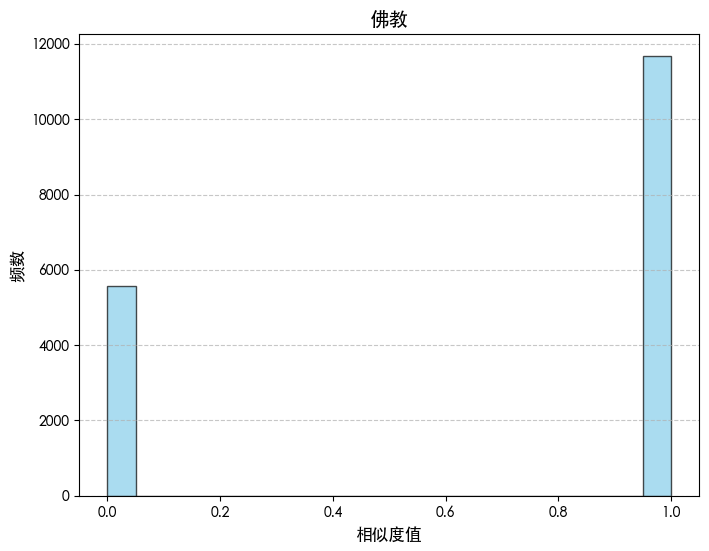

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False  # 防止负号显示为方块

# 确保“佛教_相似度”列中没有缺失值
df = df.dropna(subset=['佛教_相似度'])

# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(df['佛教_相似度'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('佛教', fontsize=14)
plt.xlabel('相似度值', fontsize=12)
plt.ylabel('频数', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.show()

In [38]:

import os
import pandas as pd

# 读取文件夹内所有txt文件的名称（不含.txt）
def get_txt_filenames(folder_path):
    txt_files = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            # 去掉文件扩展名（.txt）
            txt_files.append(os.path.splitext(file_name)[0])
    return txt_files

# 读取CSV文件中的"Name"列
def get_names_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    # 假设CSV中有"Name"列
    return df['name'].tolist()

# 设置路径
folder_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/raw_data_tales/吉林596'
csv_path = '/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/data/Merged_Ethnicity_Data_with_English_Names_Xue.csv'

# 获取txt文件名称
txt_filenames = get_txt_filenames(folder_path)

# 获取CSV文件中的名称
csv_names = get_names_from_csv(csv_path)

# 合并两个列表
combined_list = txt_filenames + csv_names
combined_list

['02084__062严羽暑天着羊裘',
 '02081__059李纲巧阻皇帝过沙县',
 '02127__108王绍兰判斗案',
 '02246__228资国寺',
 '02399__386-老鼠借牙',
 '02336__321明姜的传说',
 '02128__109谢瑁樵三难学台',
 '02284__266抓“苏维埃',
 '02028__003,皇天爷和皇天姆造人',
 '02310__294还瑰草',
 '02571__564包国生逗贪吃',
 '02100__079-万人锅',
 '02518__510义盗宋沼',
 '02560__553-寡妇改嫁',
 '02502__493考女婿',
 '02329__313龙眼果和桂圆干',
 '02535__527县太爷选贤人',
 '02113__095大力士吴仔恩',
 '02121__102叫化子喝老爷',
 '02151__132放下屠刀立地成佛',
 '02578__571赵六滩斗知县',
 '02479__469巧妇智斗“鸭肉香',
 '02506__497-两瓮银',
 '02250__232万木林的来历',
 '02066__043风吹松子满山生',
 '02082__060王璞作活画',
 '02297__281五步蛇',
 '02172__153杉竹和合',
 '02279__261-#被',
 '02132__113智除奸细',
 '02348__333“佛跳墙”的传说',
 '02242__224雪峰寺的传说',
 '02281__263陈毅拜师',
 '02557__549冬夜擒贼',
 '02042__019#罗解梦',
 '02389__376红布盖头的由来',
 '02496__487“铁公鸡吃鸡',
 '02237__219通仙桥',
 '02492__483长年智斗财主',
 '02075__053葱补丹田麦补脾',
 '02527__519百忍堂',
 '02228__210望云楼',
 '02201__183-出钱石',
 '02358__344二月二的由来',
 '02280__262草鞋船',
 '02598__591学懒',
 '02212__194银池岗',
 '02516__508三家福',
 '02190__171美人山望台湾',
 '02463__453

In [21]:
df_cleaned = df[~df['name'].isin(combined_list)]

In [39]:
# 假设相似度列名中包含 'similarity'，您可以根据实际情况调整
similarity_columns = [col for col in df.columns if '相似度' in col]

# 按 'area_group' 列分组，计算相似度列的平均值
grouped_df = df_cleaned.groupby('area_group')[similarity_columns].mean()
grouped_df

,遵守_相似度,帝王_相似度,古时候_相似度,结拜_相似度,仁义_相似度,孝道_相似度,馈赠_相似度,道教_相似度,宗族_相似度,忠诚_相似度,...,佛教_相似度,杀戮_相似度,信任_相似度,惩罚_相似度,长寿_相似度,慈善_相似度,儒家_相似度,诚实_相似度,平等_相似度,努力_相似度
area_group,,,,,,,,,,,,,,,,,,,,,
上海,0.926121,0.614776,0.948549,0.919525,0.547493,0.800792,0.874670,0.641161,0.918206,0.885224,...,0.501319,0.187335,0.937995,0.642480,0.849604,0.779683,0.712401,0.555409,0.839050,0.972296
云南,0.950000,0.600000,1.000000,0.900000,0.600000,0.850000,0.950000,0.750000,0.900000,0.900000,...,0.800000,0.600000,0.800000,0.650000,0.900000,0.850000,0.700000,0.450000,0.800000,0.950000
北京,0.922942,0.577933,0.928196,0.842382,0.516637,0.788091,0.880911,0.704028,0.894921,0.789842,...,0.577933,0.311734,0.893170,0.683012,0.828371,0.726795,0.705779,0.583187,0.714536,0.933450
四川,0.925764,0.494541,0.828603,0.873362,0.634279,0.807860,0.893013,0.590611,0.779476,0.658297,...,0.724891,0.324236,0.817686,0.689956,0.814410,0.803493,0.729258,0.587336,0.718341,0.831878
天津,0.918669,0.574861,0.824399,0.866913,0.619224,0.794824,0.857671,0.543438,0.772643,0.621072,...,0.571165,0.303142,0.861368,0.608133,0.811460,0.776340,0.741220,0.658041,0.698706,0.850277
宁夏,0.953528,0.528399,0.934596,0.927711,0.681583,0.862306,0.938038,0.549053,0.910499,0.860585,...,0.654045,0.280551,0.910499,0.705680,0.850258,0.872633,0.798623,0.602410,0.864028,0.950086
安徽,0.932927,0.636585,0.875610,0.900000,0.675610,0.817073,0.902439,0.709756,0.852439,0.742683,...,0.739024,0.332927,0.880488,0.793902,0.868293,0.817073,0.823171,0.710976,0.782927,0.898780
山西,0.934233,0.534570,0.836425,0.893761,0.689713,0.843170,0.908938,0.596965,0.807757,0.728499,...,0.721754,0.332209,0.870152,0.704890,0.849916,0.851602,0.816189,0.713322,0.765599,0.870152
广东,0.936620,0.576291,0.812207,0.877934,0.625587,0.758216,0.863850,0.693662,0.784038,0.649061,...,0.706573,0.292254,0.860329,0.761737,0.820423,0.782864,0.751174,0.671362,0.754695,0.880282


In [40]:
import pandas as pd

# 假设你的 DataFrame 名为 df
# 定义一个映射字典
province_mapping = {
    "上海": "上海市",
    "云南": "云南省",
    "北京": "北京市",
    "吉林": "吉林省",
    "四川": "四川省",
    "天津": "天津市",
    "宁夏": "宁夏回族自治区",
    "安徽": "安徽省",
    "山西": "山西省",
    "广东": "广东省",
    "广西": "广西壮族自治区",
    "新疆": "新疆维吾尔自治区",
    "江苏": "江苏省",
    "江西": "江西省",
    "河北": "河北省",
    "河南": "河南省",
    "浙江": "浙江省",
    "海南": "海南省",
    "湖北": "湖北省",
    "湖南": "湖南省",
    "甘肃": "甘肃省",
    "福建": "福建省",
    "西藏": "西藏自治区",
    "贵州": "贵州省",
    "辽宁": "辽宁省",
    "陕西": "陕西省"
}

# 使用映射字典更新索引
grouped_df.index = grouped_df.index.map(province_mapping)

grouped_df

,遵守_相似度,帝王_相似度,古时候_相似度,结拜_相似度,仁义_相似度,孝道_相似度,馈赠_相似度,道教_相似度,宗族_相似度,忠诚_相似度,...,佛教_相似度,杀戮_相似度,信任_相似度,惩罚_相似度,长寿_相似度,慈善_相似度,儒家_相似度,诚实_相似度,平等_相似度,努力_相似度
area_group,,,,,,,,,,,,,,,,,,,,,
上海市,0.926121,0.614776,0.948549,0.919525,0.547493,0.800792,0.874670,0.641161,0.918206,0.885224,...,0.501319,0.187335,0.937995,0.642480,0.849604,0.779683,0.712401,0.555409,0.839050,0.972296
云南省,0.950000,0.600000,1.000000,0.900000,0.600000,0.850000,0.950000,0.750000,0.900000,0.900000,...,0.800000,0.600000,0.800000,0.650000,0.900000,0.850000,0.700000,0.450000,0.800000,0.950000
北京市,0.922942,0.577933,0.928196,0.842382,0.516637,0.788091,0.880911,0.704028,0.894921,0.789842,...,0.577933,0.311734,0.893170,0.683012,0.828371,0.726795,0.705779,0.583187,0.714536,0.933450
四川省,0.925764,0.494541,0.828603,0.873362,0.634279,0.807860,0.893013,0.590611,0.779476,0.658297,...,0.724891,0.324236,0.817686,0.689956,0.814410,0.803493,0.729258,0.587336,0.718341,0.831878
天津市,0.918669,0.574861,0.824399,0.866913,0.619224,0.794824,0.857671,0.543438,0.772643,0.621072,...,0.571165,0.303142,0.861368,0.608133,0.811460,0.776340,0.741220,0.658041,0.698706,0.850277
宁夏回族自治区,0.953528,0.528399,0.934596,0.927711,0.681583,0.862306,0.938038,0.549053,0.910499,0.860585,...,0.654045,0.280551,0.910499,0.705680,0.850258,0.872633,0.798623,0.602410,0.864028,0.950086
安徽省,0.932927,0.636585,0.875610,0.900000,0.675610,0.817073,0.902439,0.709756,0.852439,0.742683,...,0.739024,0.332927,0.880488,0.793902,0.868293,0.817073,0.823171,0.710976,0.782927,0.898780
山西省,0.934233,0.534570,0.836425,0.893761,0.689713,0.843170,0.908938,0.596965,0.807757,0.728499,...,0.721754,0.332209,0.870152,0.704890,0.849916,0.851602,0.816189,0.713322,0.765599,0.870152
广东省,0.936620,0.576291,0.812207,0.877934,0.625587,0.758216,0.863850,0.693662,0.784038,0.649061,...,0.706573,0.292254,0.860329,0.761737,0.820423,0.782864,0.751174,0.671362,0.754695,0.880282


In [41]:
import os
from pyecharts.charts import Map
from pyecharts import options as opts

# 生成地图的函数
def generate_map(dataframe, column_name, output_folder):
    """
    根据给定的列生成一张地图并保存到指定文件夹。
    :param dataframe: 数据表
    :param column_name: 需要绘制的列名
    :param output_folder: 保存 HTML 文件的文件夹路径
    """
    # 确保输出文件夹存在
    os.makedirs(output_folder, exist_ok=True)

    # 数据准备
    data = list(zip(dataframe.index, dataframe[column_name]))  # 将地区和数值打包成列表
    
    # 创建地图
    map_chart = (
        Map()
        .add(
            series_name=column_name,  # 显示的图例名称
            data_pair=data,  # 地区与数据对
            maptype="china",  # 地图类型：中国
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"{column_name} 地图"),
            visualmap_opts=opts.VisualMapOpts(
                max_=dataframe[column_name].max(),
                min_=dataframe[column_name].min(),
            range_color=[
                "#f7fbff", "#e6f4fc", "#d2e9f7", "#c2e0f7", "#a3c9f2", 
                "#85b2ed", "#669ce8", "#4a88e3", "#3f75a5", "#2c5b88", 
                "#234c72", "#1c3b5d"
            ]
                                    ),
        )
    )
    
    # 保存为 HTML 文件
    output_path = os.path.join(output_folder, f"{column_name}_map.html")
    map_chart.render(output_path)
    print(f"{column_name} 的地图已生成并保存到 {output_path}！")

# 指定输出文件夹
output_folder_html = "/Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7"

# 遍历 grouped_df 的每一列生成地图
for column in grouped_df.columns:
    generate_map(grouped_df, column, output_folder_html)

遵守_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7/遵守_相似度_map.html！
帝王_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7/帝王_相似度_map.html！
古时候_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7/古时候_相似度_map.html！
结拜_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7/结拜_相似度_map.html！
仁义_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7/仁义_相似度_map.html！
孝道_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7/孝道_相似度_map.html！
馈赠_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/Research_Onging/2410_LSE_Xue/result/241121map_similarity_score_cutoff_0.7/馈赠_相似度_map.html！
道教_相似度 的地图已生成并保存到 /Users/zhaorunping/Desktop/R

In [6]:
# 定义导出文件路径
output_file_path = '/Users/zhaorunping/Desktop/241119province_similarity_scores.csv'

# 将 grouped_df 导出为 CSV 文件
grouped_df.to_csv(output_file_path)

print(f"Group data has been exported to {output_file_path}")

Group data has been exported to /Users/zhaorunping/Desktop/241119province_similarity_scores.csv
